In [1]:
# Packages used:
library(tidyverse)
library(keras)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
samp <- read_csv("../input/lish-moa/sample_submission.csv")
test <- read_csv("../input/lish-moa/test_features.csv")
train <- read_csv("../input/lish-moa/train_features.csv")
scores <- read_csv("../input/lish-moa/train_targets_scored.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  sig_id = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  sig_id = col_character(),
  cp_type = col_character(),
  cp_dose = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  sig_id = col_character(),
  cp_type = col_character(),
  cp_dose = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  sig_id = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [3]:
x_test <- test[,-c(1:4)]
x_train <- train[,-c(1:4)]
x_train <- as.matrix(x_train)
x_test <- as.matrix(x_test)
# names(x_test) <- names(x_train) <- c(paste0("g",0:771),paste0("c",0:99))
# dim(x_train)
y_train <- as.matrix(scores[,2:207]) #, center=T, scale=T)
# for (i in 2:207){ # (i in 2:207)
#   y_train <- scores[,i]
#   y_train_OHE <- to_categorical(y_train) 

In [4]:
 #keras model 
  
  # defining the model and layers
  model <- keras_model_sequential()
  model %>%
    layer_dense(units = 4096, activation = 'relu',
                input_shape = c(872)) %>%
    layer_dropout(rate = 0.9) %>%
    layer_dense(units = 2048, activation = 'relu') %>%
    layer_dropout(rate = 0.85) %>%
    layer_dense(units = 1024, activation = 'relu') %>%
    layer_dropout(rate = 0.85) %>%
    layer_dense(units = 512, activation = 'relu') %>%
    layer_dropout(rate = 0.8) %>%
    layer_dense(units = 256, activation = 'relu') %>%
    layer_dropout(rate = 0.8) %>%
    layer_dense(units = 128, activation = 'relu') %>%
    layer_dense(units = 205, activation = 'sigmoid')
  
  
  model %>% compile(
    loss = 'binary_crossentropy',
    optimizer = "adam",
    metrics = c('accuracy')
  )

In [5]:

  # train (fit)
  model %>% fit(
    x_train, as.matrix(y_train[,-1]), # _OHE,
    epochs = 100, batch_size = 128,
    validation_split = 0.2
  )
  
  check <- model %>% predict_proba(x_test)
  samp[,2:207] <- check[,2]
  
  
# }

`geom_smooth()` using formula 'y ~ x'



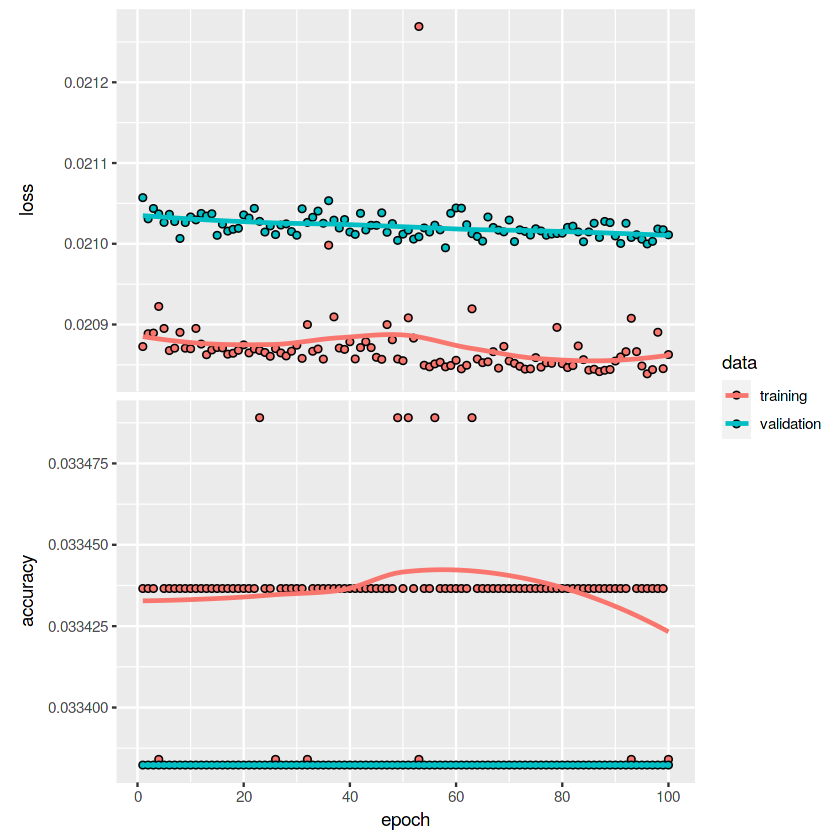

In [6]:
plot(model %>% fit(
    x_train, as.matrix(y_train[,-1]), # _OHE,
    epochs = 100, batch_size = 128,
    validation_split = 0.2
  ))

In [7]:
write_csv(samp, file = "./submission.csv")

In [8]:
glimpse(samp)

Rows: 3,982
Columns: 207
$ sig_id                                          <chr> "id_0004d9e33", "id_0…
$ `5-alpha_reductase_inhibitor`                   <dbl> 0.001161318, 0.001161…
$ `11-beta-hsd1_inhibitor`                        <dbl> 0.001161318, 0.001161…
$ acat_inhibitor                                  <dbl> 0.001161318, 0.001161…
$ acetylcholine_receptor_agonist                  <dbl> 0.001161318, 0.001161…
$ acetylcholine_receptor_antagonist               <dbl> 0.001161318, 0.001161…
$ acetylcholinesterase_inhibitor                  <dbl> 0.001161318, 0.001161…
$ adenosine_receptor_agonist                      <dbl> 0.001161318, 0.001161…
$ adenosine_receptor_antagonist                   <dbl> 0.001161318, 0.001161…
$ adenylyl_cyclase_activator                      <dbl> 0.001161318, 0.001161…
$ adrenergic_receptor_agonist                     <dbl> 0.001161318, 0.001161…
$ adrenergic_receptor_antagonist                  <dbl> 0.001161318, 0.001161…
$ akt_inhibitor            